In [1]:
# import generic libraries
import os
import pandas as pd # type: ignore
import numpy as np
import missingno as msno
import statsmodels.api as sm

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Allows to display all of the outputs of a cell
from IPython.display import display

# Set the maximum number of row to be displayed
pd.options.display.max_rows = 100

# Set global visualisation settings
plt.rc('font', size=14)

# Set float data type format
pd.options.display.float_format = '{:,.2f}'.format

# machine learning algorithms and other model helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [2]:
# Set the working directory
os.chdir('C:/Users/sunil/OneDrive/Documents/Coding/Projects/payments_fraud')

# path to csv
csv_file = 'PS_20174392719_1491204439457_log.csv'

# initialize and read csv
df = pd.read_csv(csv_file)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None

<AxesSubplot:>

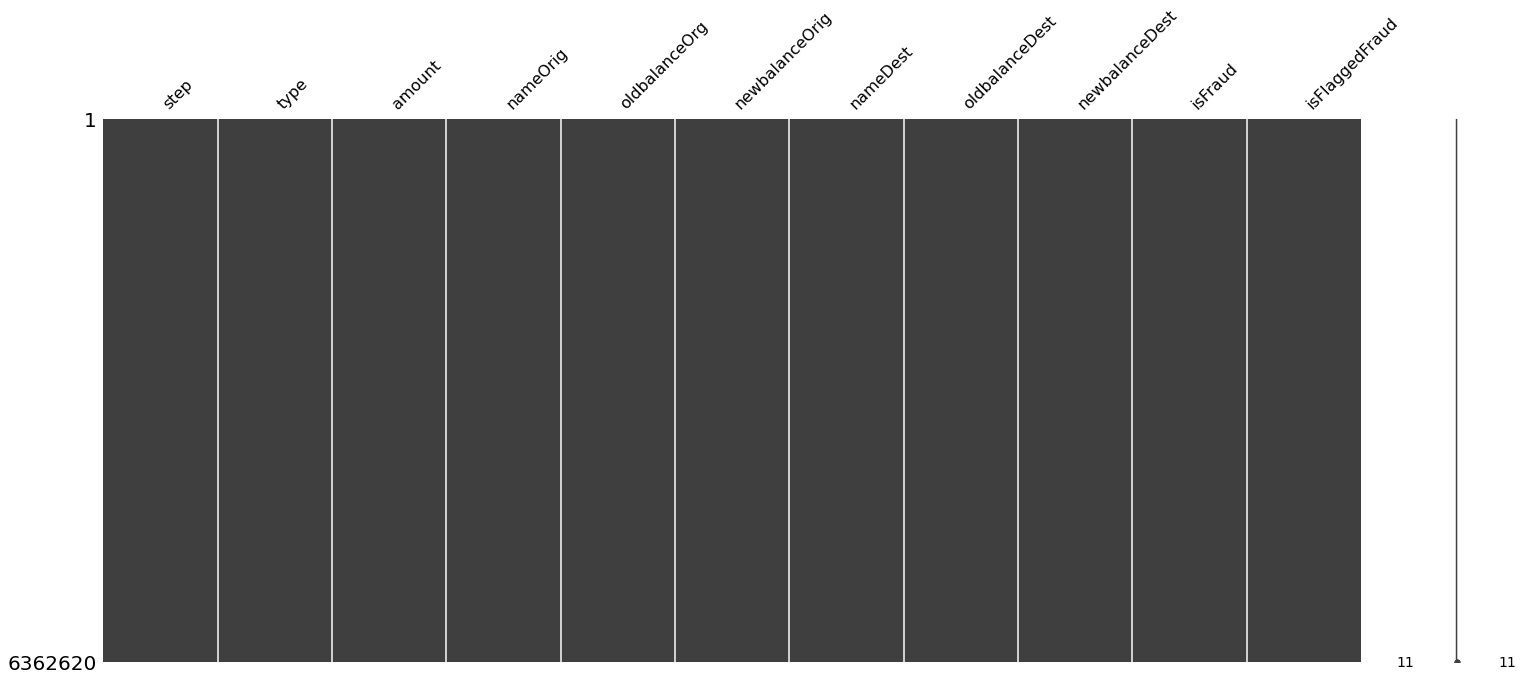

In [3]:
# data processing
display(df.describe())

display(df.info())

msno.matrix(df)

#### note: the dataset has no missing values 

In [4]:
# Retaining the relevant features and the target variable (isFraud)
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [5]:
# observing value of counts of fraudulent and non-fraudulent activity
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64